## Partial Dependence Plot(PDP)
- show the marginal effect one or two features have on the predicted outcom of a machine learning model.

- 변수가 target값에 영향을 주는 정도를 파악할 수 있다.


- 예시

1.계절이라는 변수에 대해 해석하고 싶다. 

2.먼저, model을 만든다. 

3.계절변수를 모두 각각 spring, summer,fall, winter로 바꾸고 (나머지는 유지) 만든 model로 prediction을 하고 모든 값에 대해 평균을 낸다.

4.이렇게 하면 나머지는 그대로인데 계절변수의 값만 바뀌었을 때 어떻게 변하는지 파악할 수 있다.

5.numeric data도 똑같다. 해당 변수의 값마다하면 된다.(오래걸릴수도, 데이터가 sparse한 지역에서는 다소 불안정할 수도)

#### 장단점
- 목표로 삼은 변수가 다른 변수와의 관계가 없다면 해석이 상당히 clear해진다. (단점이기도 하다)
- easy to implement
- 현실적으로 maximum number of features 가 2개이다. (시각화때문에)
- 변수가 상관관계가 없다고 가정한다.
- Heterogeneous effects might be hidden.

sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 

# sns.set_style(style='white')
sns.set_context(context ='paper')

C:\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
day = pd.read_csv('data/day.csv')

In [3]:
day.head(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [11]:
X = day.iloc[:,2:-1]
y = day.cnt

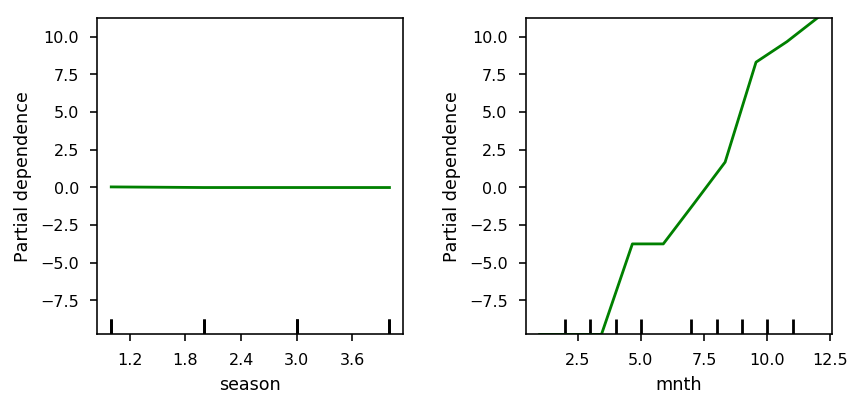

In [14]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor

# scikit-learn originally implemented partial dependence plots only for Gradient Boosting models
# this was due to an implementation detail, and a future release will support all model types.

my_model = GradientBoostingRegressor()

# fit the model as usual
my_model.fit(X, y)

# Here we make the plot
my_plots = plot_partial_dependence(my_model,       
                                   features=[0, 2], # column numbers of plots we want to show
                                   X=X,            # raw predictors data.
                                   feature_names=['season','yr','mnth'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis

이 친구들도 PDP를 포함한 model interpretation을 위한 라이브러리라고 보면 된다. sklearn보다 더 다양하고 좋아보인다. 설치가 귀찮아서 일단 안했다. 
- pdpbox
- skater

## Individual Conditional Expectation(ICE)

- PDP는 모든 observation들의 prediction을 평균을 내었다면 ICE는 각각 observation들의 변화를 살펴보는 것이다.
- PDP에 비해 변수간 interaction에 대한 insight를 더 준다.
- 라이브러리는 PDP와 동일한듯 보인다.

#### 장단점
- PDP 보다 heterogeneous한 relationship을 보여줄 수 있다.
- 평균적인 모습을 보기 어렵다. 복잡할 수 있다.

## Accumulated Local Effects (ALE) plot

- describe how features influence the prediction of a machine learning model on average.

### motivation and intuition
- PDP는 correlated 된 변수가 있는 경우 상당히 취약하다.
- 예를 들어, 집 넓이(우리가 알고 싶은 변수)가 10인 경우에 대해 prediction의 평균을 계산한다고 할 때, 방의 갯수가 5개인 observation에 대해서는 현실적으로 말이 안된다. 이는 부정확한 예측을 초래할 수 있다.
- 원래 집 크기가 10인 경우에는 방이 3개 정도라고 하자. 우리는 집 크기가 10일 때 영향을 보고 싶다.
- PDP의 경우, 집 크기를 10으로 하고 방의 갯수를 marginalize한다. 즉, 방의 갯수가 1인 경우, 10인 경우 모두 계산의 범위에 들어간다.
- 이를 방지하기 위해 M-Plot이라는 개념이 생긴다. 이는 conditional dist를 이용한다. 즉, 방의 크기가 3 근처인 obseravtion들에 대해서만 계산의 범위(평균내는 것은 동일)에 둔다는 것이다. 이를 통해 (상관성있는)두 변수의 effect를 추정할 수 있다. 하지만 이런 effect가 mixed되어 있다는 단점이 있다.
- 이를 위해 ALE가 나왔다.
- ALE도 conditional dist에 기반을 둔다. ALE는 방 갯수를 제외한 집 넓이의 영향만 보여준다. 평균 대신에 differences in predictions을 계산한다. 집 넓이가 9이고 11인 것의 prediction 차이를 통해 집 넓이(10인경우)의 pure effect를 계산한다.

### estimation
- to estimate local effect, 변수를 많은 intervals로 나누고 predictions의 차이를 계산한다. 이러한 과정은 gradient를 approximates하는 것으로 이해할 수 있다.

- 내용이 어려워서 일단은 나중에 하기로 한다.

## Feature Interaction

- 책에서 알려준 방법은 Friedman's H-statistic 이다.

## Feature Importance

- permutation feature importance measurement 방법(python skater에 있다고 한다)

1.original model의 error를 계산한다.

2.변수별로 변수의 값을 suffle하여 error를 계산한다.

3.error의 변화폭이 클수록 중요한 변수이다.

- model reliance (model-agnostic)

should I compute Importance on training or test data?
- training data를 통해 feature importance를 본다면 그 모델은 overfitting된 상태일 수도 있으며 이는 부정확한 사실이 될 수도 있다.
- trained model에서 중요했던 변수가 test data를 통해 예측할 때는 중요하지 않을 수도 있는 것이다.
- 저자는 정답이 없다고 한다.
- 일단 train data와 test data를 모두 알고 있는 상태라면 두 집단이 비슷한 모습을 갖고 있는지 잘 살펴봐야할 것이다.

### 장단점(permutation feature importance의)
- nice interpretation
- highly compressed, global insight
- 모델을 retraning 시킬 필요가 없다.
- 자동적으로 변수가 모든 interaction을 고려한다. permuting하여 변수간의 interaction을 파괴한다. 이는 model performance에 있어서 main feature effect와 interaction effect를 고려하는 것이다. (물론 단점이기도 하다)
- train data or test data를 사용할지 불확실하다.
- permutation을 할 때마다 결과가 달라질 수 있다.
- error를 계산해야되는 때문에 output값을 알고 있어야 한다.
- PDP에서와 마찬가지로 변수가 correlated 되어 있으면 impoertance 결과가 biased 되어 있을 수도 있다.
- (permutation 뿐만 아니라) feature importance를 계산하는데 있어서 correlated 되어있는 변수는 변수의 importance의 순위에 영향을 준다. 예를 들어, RF에서 x1이 가장 중요한 변수이다. 근데 이와 상관관계가 높은 x2가 추가되었다고 생각해보자. 비슷하기에 트리마다 다르게 x1과 x2를 중요하다고 할 것이다. 그러면 결국 최종 importance 산정에 있어서 가장 중요했던 x1은 중간순위로 밀려날 수 있는 것이다.

## Global Surrogate
- global surrogate model is an interpretable model that is traind to approximate the predictions of a black box model.

### Theory
- surrogate model의 목적은 prediction을 approximate하고 동시에 interpretable하게 하는 것이다.

surrogate model의 과정은 다음과 같다.

1.black box model을 fit한다.

2.interpretable한 model type을 고른다. (linear model, DT)

3.interpretable한 model을 fit한다.

4.그 모델의 prediction이 black box model을 prediction을 잘 보여주는지 확인한다.

### 장단점
- flexible
- surrogate model이 black box model을 어느정도 해석할 때 만족할 것인가에 대한 기준이 없다.
- 결론이 data가 아니라 model에 대한 것이다.